<a href="https://colab.research.google.com/github/rkp74/Fake-News-Classifier/blob/main/Fake_News_Classifier_using_TfIdfVectorizer_and_Hashing_vectorizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset = [Fake news Dataset](https://https://www.kaggle.com/competitions/fake-news/data)

In [60]:
import pandas as pd
import numpy as np
import nltk
import re
from sklearn import metrics
import itertools

In [61]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [62]:
df = pd.read_csv('train.csv')
df2 = pd.read_csv('test.csv')

In [63]:
# Get the Independent Features
X = df.drop('label',axis=1)

In [64]:
# get the dependent Features
Y = df['label']

In [65]:
from sklearn.feature_extraction.text import CountVectorizer

In [66]:
df = df.dropna()


In [67]:
messages = df.copy()
messages2 = df2.copy()

In [68]:
messages.reset_index(inplace=True)
messages2.reset_index(inplace=True)

In [69]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [70]:
corpus = []
for i in range(0,len(messages)):
  review = re.sub('[^a-zA-Z]', ' ' ,messages['title'][i])
  review = review.lower()
  review = review.split()
  review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
  review = ' '.join(review)
  corpus.append(review)

In [71]:
corpus2 = []
for i in range(0,len(messages2)):
  review = re.sub('[^a-zA-Z]', ' ' ,str(messages2['title'][i]))
  review = review.lower()
  review = review.split()
  review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
  review = ' '.join(review)
  corpus2.append(review)

In [72]:
# Applying CountVectorizer to create bag words of model
from sklearn.feature_extraction.text import TfidfVectorizer
tiv = TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X_train = tiv.fit_transform(corpus).toarray()

In [73]:
# Applying CountVectorizer to create bag words of model
from sklearn.feature_extraction.text import TfidfVectorizer
tiv = TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X_test = tiv.fit_transform(corpus2).toarray()

In [74]:
y_train = messages['label']

In [75]:
y_test = pd.read_csv('submit.csv')
y_test = y_test['label']

In [76]:
X_train.shape

(18285, 5000)

In [77]:
X_test.shape

(5200, 5000)

In [78]:
y_train.shape

(18285,)

In [79]:
y_test.shape

(5200,)

In [80]:
tiv.get_feature_names_out()[:20]

array(['aaron', 'abandon', 'abba', 'abbi', 'abbi martin',
       'abbi martin expos', 'abc', 'abe', 'abedin', 'abedin email',
       'abolish', 'abort', 'abram', 'abroad', 'abroad new',
       'abroad new york', 'absolut', 'abus', 'academi', 'accept'],
      dtype=object)

In [81]:
tiv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [82]:
count_df = pd.DataFrame(X_train, columns = tiv.get_feature_names_out())

In [83]:
count_df.head(10)

,aaron,abandon,abba,abbi,abbi martin,abbi martin expos,abc,abe,abedin,abedin email,...,young,youth,youtub,youtub ban,youtub ban clinton,zero,zika,zika viru,zone,zuckerberg
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [84]:
import matplotlib.pyplot as plt

In [85]:
def plot_confusion_matrix(cm,classes,normalize=False,title='Confusion matrix', cmap = plt.cm.Blues):
  plt.imshow(cm, interpolation ='nearest',cmap = cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks,classes,rotation = 45)
  plt.yticks(tick_marks,classes)

  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
    print("Normalized Confusion Matrix")
  else:
    print("Confusion Matrix without Normalization")

  thresh = cm.max() / 2
  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i,cm[i,j],
             horizontalalignment = "center",
             color="white" if cm[i,j] > thresh else "black")
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')  

# Multinomial NB Algorithm

In [86]:
from sklearn.naive_bayes import MultinomialNB
cfr = MultinomialNB()

In [87]:
cfr.fit(X_train,y_train)
pred = cfr.predict(X_test)

accuracy:  0.536 
Confusion Matrix without Normalization


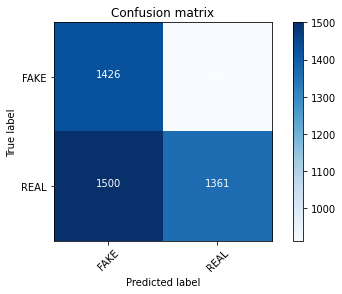

In [88]:
score = metrics.accuracy_score(y_test,pred)
print("accuracy:  %0.3f " % score)
cm = metrics.confusion_matrix(y_test,pred)
plot_confusion_matrix(cm, classes =['FAKE' , 'REAL'])

# Passive Aggressive Classifier Algorithm

In [89]:
from sklearn.linear_model import PassiveAggressiveClassifier
pac = PassiveAggressiveClassifier(n_iter_no_change=50)

In [90]:
pac.fit(X_train,y_train)
pred = pac.predict(X_test)

accuracy:  0.543 
Confusion Matrix without Normalization


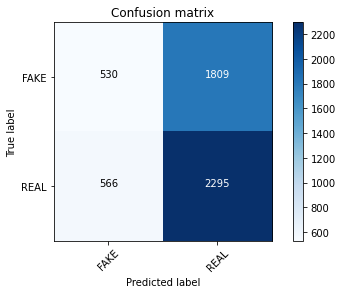

In [91]:
score = metrics.accuracy_score(y_test,pred)
print("accuracy:  %0.3f " % score)
cm = metrics.confusion_matrix(y_test,pred)
plot_confusion_matrix(cm, classes =['FAKE' , 'REAL'])

# Multinomial NB Algorithm with HyperParameter

In [92]:
classifier = MultinomialNB(alpha = 0.1)

In [93]:
previous_score = 0
for alpha in np.arange(0,1,0.1):
  sub_classifier = MultinomialNB(alpha = alpha)
  sub_classifier.fit(X_train,y_train)
  y_pred = sub_classifier.predict(X_test)
  score = metrics.accuracy_score(y_test,y_pred)
  if score > previous_score:
    classifier = sub_classifier
    print("Alpha: {}, score : {}" .format(alpha,score))

/usr/local/lib/python3.9/dist-packages/sklearn/naive_bayes.py:629: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/naive_bayes.py:635: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(


Alpha: 0.0, score : 0.5259615384615385
Alpha: 0.1, score : 0.5301923076923077
Alpha: 0.2, score : 0.5305769230769231
Alpha: 0.30000000000000004, score : 0.5336538461538461
Alpha: 0.4, score : 0.5332692307692307
Alpha: 0.5, score : 0.5334615384615384
Alpha: 0.6000000000000001, score : 0.5346153846153846
Alpha: 0.7000000000000001, score : 0.5359615384615385
Alpha: 0.8, score : 0.5357692307692308
Alpha: 0.9, score : 0.5357692307692308


In [94]:
## Get Features names
feature_names = tiv.get_feature_names_out()

In [95]:
classifier.feature_log_prob_ [0]

array([ -8.64173696,  -8.83593442,  -9.82121916,  -9.46637672,
        -9.06907628,  -9.51536555,  -9.51240728,  -7.71978943,
        -8.96997155,  -8.84264117,  -9.9659174 ,  -9.64616937,
        -8.07930034,  -9.10854284,  -9.10854284,  -9.35618751,
        -8.58571749,  -8.95335359, -10.27982784, -10.59477354,
        -9.29929137,  -9.12217551,  -8.96041364,  -8.46809648,
        -7.41777364, -10.21744711,  -9.51565182,  -9.98476249,
       -10.59477354, -10.59477354,  -9.33624666, -10.59477354,
        -9.96722226,  -9.70743686,  -8.37881705,  -7.71127455,
        -9.77913573,  -8.99730762,  -8.99730762,  -8.07210281,
        -8.42646027,  -7.91581897,  -8.67774274,  -9.22826436,
        -7.91494112,  -8.96470266,  -7.84915185,  -9.22698295,
        -8.26327097, -10.59477354,  -8.78377075,  -7.60412011,
        -9.35519312,  -8.64435982,  -9.03990314,  -8.71740062,
        -9.0605393 ,  -9.1988008 ,  -8.93591287,  -8.15352343,
        -9.21009336,  -9.21009336,  -9.44835901,  -8.83

In [96]:
#### Most Real
sorted(zip(classifier.feature_log_prob_ [0], feature_names), reverse = True)[:20]

[(-3.8832015585650996, 'net'),
 (-3.901029433802046, 'year prison'),
 (-3.901034999358375, 'new york citi'),
 (-3.9058606647439236, 'thugocraci'),
 (-3.913300530879938, 'yet new york'),
 (-3.913300530879938, 'news daili'),
 (-4.561454054636143, 'break hillari'),
 (-4.751542570932988, 'trip'),
 (-5.631718007280093, 'digit'),
 (-5.636075116092107, 'dim'),
 (-5.9934787178136215, 'russian hack'),
 (-6.2303715768203665, 'nsa'),
 (-6.35082904598948, 'assembl'),
 (-6.355871292732729, 'prayer'),
 (-6.366770003251949, 'staff'),
 (-6.383418646612073, 'rejoic'),
 (-6.402977872075765, 'hit record'),
 (-6.451227807724537, 'clean'),
 (-6.488971716036873, 'breakdown'),
 (-6.541933802546236, 'john mccain')]

In [97]:
### Most Fake
sorted(zip(classifier.feature_log_prob_ [0], feature_names))[:20]

[(-10.594773537052964, 'accept'),
 (-10.594773537052964, 'acquit'),
 (-10.594773537052964, 'across'),
 (-10.594773537052964, 'action'),
 (-10.594773537052964, 'admir'),
 (-10.594773537052964, 'airport'),
 (-10.594773537052964, 'al qaeda'),
 (-10.594773537052964, 'america great'),
 (-10.594773537052964, 'american'),
 (-10.594773537052964, 'american histori'),
 (-10.594773537052964, 'apolog'),
 (-10.594773537052964, 'applic'),
 (-10.594773537052964, 'appoint'),
 (-10.594773537052964, 'attorney'),
 (-10.594773537052964, 'australian'),
 (-10.594773537052964, 'back new york'),
 (-10.594773537052964, 'balkan'),
 (-10.594773537052964, 'bank'),
 (-10.594773537052964, 'bare'),
 (-10.594773537052964, 'barron')]

# Hashing Vectorizer 

In [98]:
from sklearn.feature_extraction.text import HashingVectorizer

In [99]:
hv = HashingVectorizer(n_features = 5000)
X = hv.fit_transform(corpus).toarray()

In [100]:
X.shape

(18285, 5000)

In [101]:
## continue as same as tf-idf vectorizer